# machineLearning   신민수

### 신용카드 사용자 연체 예측 AI 

### **[ 컬럼 정보 ]**
- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

- edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일 데이터 
  - 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미)
  -양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형	
  - Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
												
- family_size: 가족 규모
- begin_month: 신용카드 발급 월(데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
  - 낮을 수록 높은 신용의 신용카드 사용자를 의미함


# [1] 데이터 탐색
---

In [207]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [208]:
train = pd.read_csv('./creditcard/train.csv', index_col= 0 )
test = pd.read_csv('./creditcard/test.csv',index_col = 0 )

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes:

In [211]:
train.describe()

child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
count  26457.000000  2.645700e+04  26457.000000   26457.000000     26457.0   
mean       0.428658  1.873065e+05 -15958.053899   59068.750728         1.0   
std        0.747326  1.018784e+05   4201.589022  137475.427503         0.0   
min        0.000000  2.700000e+04 -25152.000000  -15713.000000         1.0   
25%        0.000000  1.215000e+05 -19431.000000   -3153.000000         1.0   
50%        0.000000  1.575000e+05 -15547.000000   -1539.000000         1.0   
75%        1.000000  2.250000e+05 -12446.000000    -407.000000         1.0   
max       19.000000  1.575000e+06  -7705.000000  365243.000000         1.0   

         work_phone         phone         email   family_size   begin_month  \
count  26457.000000  26457.000000  26457.000000  26457.000000  26457.000000   
mean       0.224742      0.294251      0.091280      2.196848    -26.123294   
std        0.417420      0.455714      0.288013      0.916717     16.559550   
min        0.000000      0.000000      0.000000      1.000000    -60.000000   
25%        0.000000      0.000000      0.000000      2.000000    -39.000000   
50%        0.000000      0.000000      0.000000      2.000000    -24.000000   
75%        0.000000      1.000000      0.000000      3.000000    -12.000000   
max        1.000000      1.000000      1.000000     20.000000      0.000000   

             credit  
count  26457.000000  
mean       1.519560  
std        0.702283  
min        0.000000  
25%        1.000000  
50%        2.000000  
75%        2.000000  
max        2.000000

In [212]:
test.describe()

child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
count  10000.000000  1.000000e+04  10000.000000   10000.000000     10000.0   
mean       0.434700  1.850433e+05 -16020.466400   59776.690400         1.0   
std        0.729102  1.015398e+05   4197.672887  138121.224504         0.0   
min        0.000000  2.700000e+04 -25152.000000  -15661.000000         1.0   
25%        0.000000  1.215000e+05 -19483.250000   -3153.000000         1.0   
50%        0.000000  1.575000e+05 -15606.000000   -1577.000000         1.0   
75%        1.000000  2.250000e+05 -12539.000000    -410.000000         1.0   
max        5.000000  1.575000e+06  -7489.000000  365243.000000         1.0   

         work_phone         phone         email   family_size   begin_month  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.227600      0.296300      0.085600      2.202700    -26.272400  
std        0.419304      0.456648      0.279786      0.898272     16.348557  
min        0.000000      0.000000      0.000000      1.000000    -60.000000  
25%        0.000000      0.000000      0.000000      2.000000    -39.000000  
50%        0.000000      0.000000      0.000000      2.000000    -25.000000  
75%        0.000000      1.000000      0.000000      3.000000    -12.000000  
max        1.000000      1.000000      1.000000      7.000000      0.000000

In [213]:
train.nunique()

gender              2
car                 2
reality             2
child_num           9
income_total      249
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       6621
DAYS_EMPLOYED    3470
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
occyp_type         18
family_size        10
begin_month        61
credit              3
dtype: int64

In [214]:
test.nunique()

gender              2
car                 2
reality             2
child_num           6
income_total      208
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       4675
DAYS_EMPLOYED    2665
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
occyp_type         18
family_size         7
begin_month        61
dtype: int64

In [215]:
# 수치형 컬럼과 상관계수
train.corr()['credit']

child_num        0.004081
income_total     0.008555
DAYS_BIRTH      -0.025187
DAYS_EMPLOYED   -0.003798
FLAG_MOBIL            NaN
work_phone      -0.003134
phone            0.003452
email            0.014812
family_size      0.008227
begin_month     -0.147477
credit           1.000000
Name: credit, dtype: float64

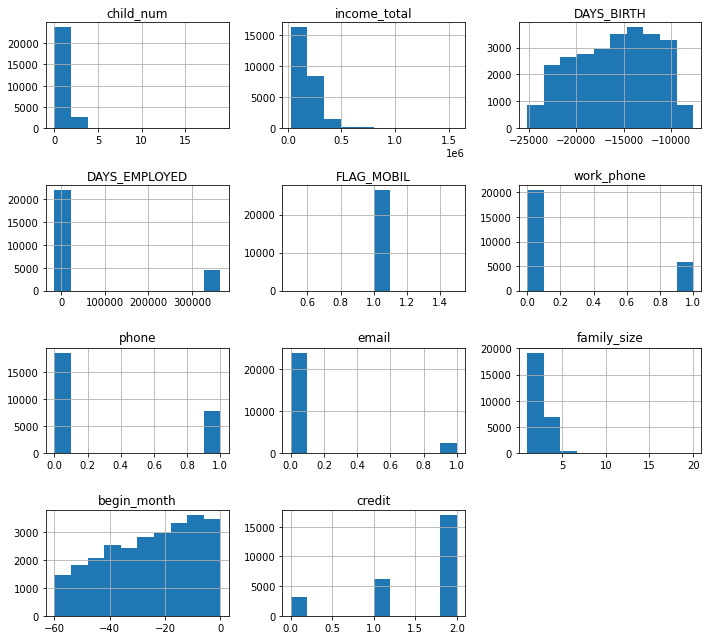

In [216]:
# train
train.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

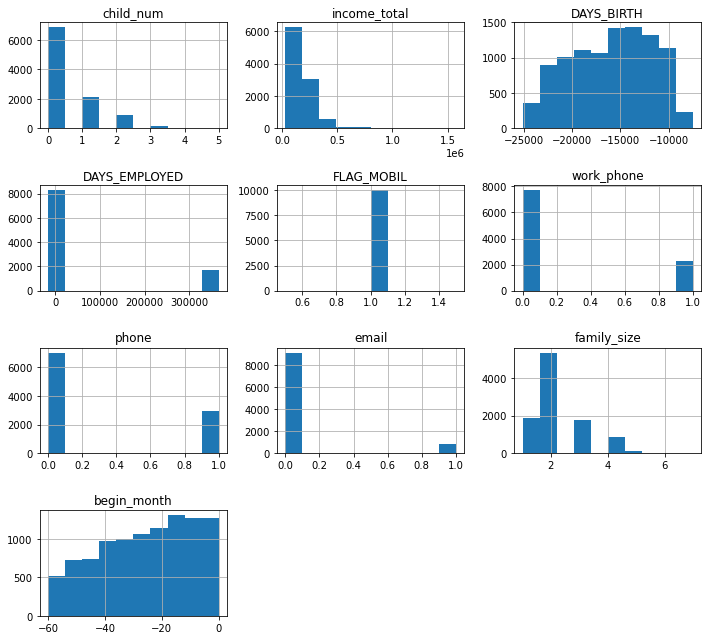

In [217]:
# test
test.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

In [218]:
# 'FLAG_MOBIL' 컬럼의 값 개수 확인
train['FLAG_MOBIL'].value_counts()
test['FLAG_MOBIL'].value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

### 데이터 탐색 결과

- train: 26457행 19열, test: 10000행 18열(타켓 열 제외됨.) 
  
- train,test 모두 occyp_type(직업)에 결측치 포함

- FLAG_MOBIL 컬럼: 하나의 값만 존재하므로 제거

- 서로 다른 개수를 가진 컬럼들 -> 통일 or 범주로 구분   
    - child_num     : 9 <-> 6
    - income_total  : 249 <-> 208
    - DAYS_BIRTH    : 6621 <-> 4675
    - DAYS_EMPLOYED : 3470 <-> 2665
    - family_size   : 10 <-> 7   
    


# [2] 데이터 전처리
---

# 2-1. 'FLAG_MOBILE' 컬럼삭제

In [221]:
train = train.drop('FLAG_MOBIL', axis=1)
test = test.drop('FLAG_MOBIL', axis=1)

# 2-2. child_num 
- train와 test의 child_num컬럼 범주를 통일

In [222]:
# train의 child_num : 0~19 
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [223]:
# test의 child_num : 0~5
test['child_num'].value_counts()

0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [224]:
# test 데이터에 없는 범주는 제외
train = train[train['child_num'] < 6]
train['child_num'].value_counts()

0    18340
1     5386
2     2362
3      306
4       47
5       10
Name: child_num, dtype: int64

# 2-3. DAYS_EMPLOYED 미취업 코드 처리
- DAYS_EMPLOYED: 업무 시작일 
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미)
    - 양수 값은 고용되지 않은 상태를 의미함

In [225]:
train['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

In [226]:
test['DAYS_EMPLOYED'].value_counts()

 365243    1697
-1678        22
-1661        21
-401         21
-2057        20
           ... 
-6359         1
-3116         1
-1623         1
-1505         1
-770          1
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64

In [227]:
# 'DAYS_EMPLOYED' 컬럼에서 양수 찾기 ---> 365243 
train_employed = train[train['DAYS_EMPLOYED'] > 0]
test_employed = test[test['DAYS_EMPLOYED'] > 0]

print(train_employed['DAYS_EMPLOYED'].unique())
print(test_employed['DAYS_EMPLOYED'].unique())

[365243]
[365243]


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


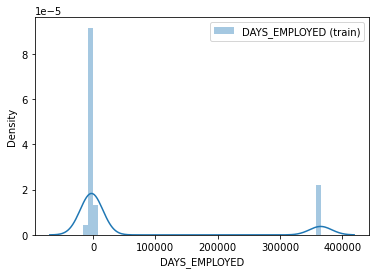

In [228]:
# 이상치 처리 전 DAYS_EMPLOYED 분포 
sns.distplot(train['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED (train)')
plt.legend() 

In [229]:
# train, test 데이터셋에서의 DAYS_EMPLOYED의 이상치 365243을 1로 변경 
train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 1
test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 1

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


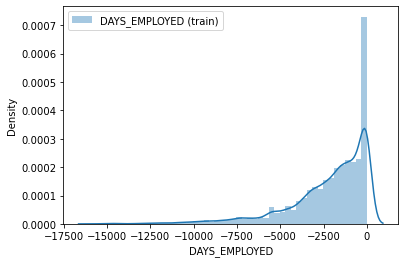

In [230]:
# 이상치 처리 후 DAYS_EMPLOYED 분포 
sns.distplot(train['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED (train)')
plt.legend() 

In [231]:
# DAYS_EMPLOYED 가공해서 EMPLOYED(고용여부) 컬럼 만들기 
train['EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: False if x == 1 else True)
test['EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: False if x == 1 else True)

train['EMPLOYED'].value_counts()

True     22013
False     4438
Name: EMPLOYED, dtype: int64

# 2-4.income_total 범주화
10개의 등급으로 나누기

In [232]:
print(train['income_total'].unique().max())
print(train['income_total'].unique().min())

1575000.0
27000.0


In [233]:
# pd.qcut : 개수에 따라 구간을 10개로 나누기
_, bins = pd.qcut(train['income_total'], 10, retbins=True)
bins = np.delete(bins, -1)
train['income_grade'] = np.digitize(train['income_total'], bins)
test['income_grad'] = np.digitize(test['income_total'], bins)

train['income_grade'].value_counts()

7     4368
3     3300
4     3266
6     2782
10    2744
9     2719
8     2636
2     2062
1     1951
5      623
Name: income_grade, dtype: int64

# 2-5. DAYS_BIRTH 연령별 범주화
- DAYS_BIRTH: 출생일   
    - 데이터 수집 당시 (0)부터 역으로 셈
    -  -1은 데이터 수집일 하루 전에 태어났음을 의미   
-> 1년 단위로 수정  
-> 20,30,40,50,60대로 연령별 범주화

In [234]:
age_train = abs(train['DAYS_BIRTH'])/365
age_test = abs(test['DAYS_BIRTH'])/365

(array([ 876., 3270., 3498., 3746., 3497., 2938., 2773., 2665., 2340.,
         848.]),
 array([21.10958904, 25.88958904, 30.66958904, 35.44958904, 40.22958904,
        45.00958904, 49.78958904, 54.56958904, 59.34958904, 64.12958904,
        68.90958904]),
 <BarContainer object of 10 artists>)

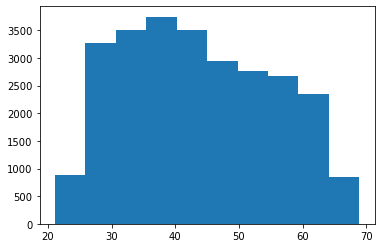

In [235]:
plt.hist(age_train)

(array([ 230., 1144., 1323., 1429., 1419., 1067., 1113., 1013.,  899.,
         363.]),
 array([20.51780822, 25.3569863 , 30.19616438, 35.03534247, 39.87452055,
        44.71369863, 49.55287671, 54.39205479, 59.23123288, 64.07041096,
        68.90958904]),
 <BarContainer object of 10 artists>)

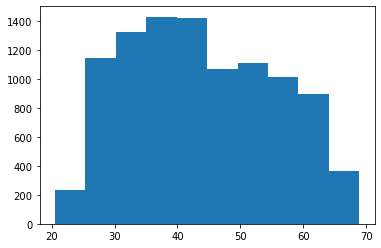

In [236]:
plt.hist(age_test)

30s    7585
40s    6763
50s    5739
20s    3608
60s    2756
Name: age, dtype: int64


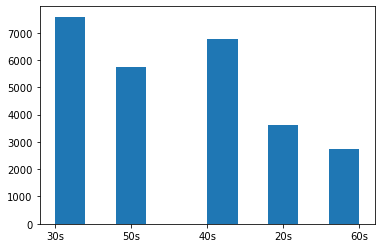

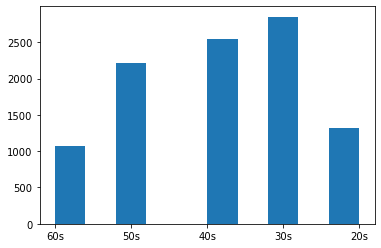

In [237]:
# 20,30,40,50,60대로 나누기

train['age'] = pd.cut(age_train, 
                    bins = [20,30,40,50,60,70], 
                    labels=['20s', '30s', '40s','50s','60s'])
test['age'] = pd.cut(age_test, 
                    bins = [20,30,40,50,60,70], 
                    labels=['20s', '30s', '40s','50s','60s'])


print(train['age'].value_counts())


plt.hist(train['age'])
plt.show()

plt.hist(test['age'])
plt.show()

# 2-6. occyp_type 결측치 처리

In [204]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [245]:
test['occyp_type'].value_counts()

Laborers                 3154
Nojob                    1697
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
High skill tech staff     343
Medicine staff            343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill Laborers         48
HR staff                   23
IT staff                   19
Realty agents              16
Name: occyp_type, dtype: int64

In [238]:
# DAYS_EMPLOYED에서 미취업코드 365243에 해당하는 경우는 직업이 없다고 보고 occyp_type 결측치를 None으로 처리 
train.loc[(train['EMPLOYED'] == False) & (train['occyp_type'].isnull()), 'occyp_type'] = 'Nojob'
test.loc[(test['EMPLOYED'] == False) & (test['occyp_type'].isnull()), 'occyp_type'] = 'Nojob'

In [244]:
# 나머지는 최빈값인 Laborers로 치환
train['occyp_type'] = train['occyp_type'].fillna('Laborers')
test['occyp_type'] = test['occyp_type'].fillna('Laborers')

In [249]:
train.head()

gender  car  reality  child_num  income_type  edu_type  family_type  \
index                                                                        
0           0    0        0          0            0         1            1   
1           0    0        1          1            0         4            0   
2           1    1        1          0            4         1            1   
3           0    0        1          0            0         4            1   
4           0    1        1          0            2         1            1   

       house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email  \
index                                                                    
0               2      -13899          -4709           0      0      0   
1               1      -11380          -1540           0      0      1   
2               1      -19087          -4434           0      1      0   
3               1      -15088          -2092           0      1      0   
4               1      -15037          -2105           0      0      0   

       occyp_type  family_size  begin_month  credit  EMPLOYED  income_grade  \
index                                                                         
0               8          2.0         -6.0     1.0      True             7   
1               8          3.0         -5.0     1.0      True             9   
2              10          2.0        -22.0     2.0      True            10   
3              15          2.0        -37.0     0.0      True             7   
4              10          2.0        -26.0     2.0      True             6   

       age  
index       
0      30s  
1      30s  
2      50s  
3      40s  
4      40s

# [3] 데이터 레이블 인코딩

In [247]:
from sklearn.preprocessing import LabelEncoder

In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         26451 non-null  int64   
 1   car            26451 non-null  int64   
 2   reality        26451 non-null  int64   
 3   child_num      26451 non-null  int64   
 4   income_type    26451 non-null  int64   
 5   edu_type       26451 non-null  int64   
 6   family_type    26451 non-null  int64   
 7   house_type     26451 non-null  int64   
 8   DAYS_BIRTH     26451 non-null  int64   
 9   DAYS_EMPLOYED  26451 non-null  int64   
 10  work_phone     26451 non-null  int64   
 11  phone          26451 non-null  int64   
 12  email          26451 non-null  int64   
 13  occyp_type     26451 non-null  int64   
 14  family_size    26451 non-null  float64 
 15  begin_month    26451 non-null  float64 
 16  credit         26451 non-null  float64 
 17  EMPLOYED       26451 non-null  

In [248]:
# 문자열 컬럼 추출
str_cols = train.columns[train.dtypes == object].tolist()

# 제거할 컬럼 추출
train = train.drop('income_total',axis=1)
test = test.drop('income_total',axis=1)

for col in str_cols:
  #col = str(col)
  encoder = LabelEncoder()
  encoder.fit(train[col])
  labels = encoder.transform(train[col]) # 숫자 라벨 생성
  train[col] = labels
  
  print(col)
  print(labels) 
  print(encoder.classes_) # 바꾸기 전 속성 체크
  print('------------------------------------------------------')

gender
[0 0 1 ... 0 1 0]
['F' 'M']
------------------------------------------------------
car
[0 0 1 ... 1 0 0]
['N' 'Y']
------------------------------------------------------
reality
[0 1 1 ... 0 1 0]
['N' 'Y']
------------------------------------------------------
income_type
[0 0 4 ... 4 4 4]
['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
------------------------------------------------------
edu_type
[1 4 1 ... 4 2 4]
['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
------------------------------------------------------
family_type
[1 0 1 ... 0 3 0]
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
------------------------------------------------------
house_type
[2 1 1 ... 5 1 1]
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
------------------------------------------------------
occyp_type
[ 8  8 10 ... 

In [260]:
train

gender  car  reality  child_num  income_type  edu_type  family_type  \
index                                                                        
0           0    0        0          0            0         1            1   
1           0    0        1          1            0         4            0   
2           1    1        1          0            4         1            1   
3           0    0        1          0            0         4            1   
4           0    1        1          0            2         1            1   
...       ...  ...      ...        ...          ...       ...          ...   
26452       0    0        0          2            2         4            1   
26453       0    0        1          1            4         1            2   
26454       0    1        0          0            4         4            0   
26455       1    0        1          0            4         2            3   
26456       0    0        0          0            4         4            0   

       house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email  \
index                                                                    
0               2      -13899          -4709           0      0      0   
1               1      -11380          -1540           0      0      1   
2               1      -19087          -4434           0      1      0   
3               1      -15088          -2092           0      1      0   
4               1      -15037          -2105           0      0      0   
...           ...         ...            ...         ...    ...    ...   
26452           1      -12079          -1984           0      0      0   
26453           1      -15291          -2475           0      0      0   
26454           5      -10082          -2015           0      0      0   
26455           1      -10145           -107           0      0      0   
26456           1      -19569          -1013           0      0      0   

       occyp_type  family_size  begin_month  credit  EMPLOYED  income_grade  \
index                                                                         
0               8          2.0         -6.0     1.0      True             7   
1               8          3.0         -5.0     1.0      True             9   
2              10          2.0        -22.0     2.0      True            10   
3              15          2.0        -37.0     0.0      True             7   
4              10          2.0        -26.0     2.0      True             6   
...           ...          ...          ...     ...       ...           ...   
26452           3          4.0         -2.0     1.0      True             8   
26453           8          2.0        -47.0     2.0      True             7   
26454           3          2.0        -25.0     2.0      True             9   
26455           8          1.0        -59.0     2.0      True             6   
26456          17          2.0         -9.0     2.0      True             1   

       age  
index       
0      30s  
1      30s  
2      50s  
3      40s  
4      40s  
...    ...  
26452  30s  
26453  40s  
26454  20s  
26455  20s  
26456  50s  

[26451 rows x 20 columns]

# [3] input_data, target 나누기 

In [255]:
# input_data, target 나누기
target = train['credit']
input_data = train.drop('credit', axis = 1)

print(target.shape)
print(input_data.shape)

(26451,)
(26451, 19)


In [256]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# train,test 나누기
train_X,test_X,train_y,test_y = train_test_split(input_data,target,test_size = 0.2, stratify=target ,random_state=42 )

In [257]:
# 랜덤추출로 데이터 1000행 추출
data_random = train.sample(n=1000,random_state=42)

# 3000개 램덤추출 데이터
target_random = data_random['credit']
input_random = data_random.drop('credit', axis = 1)

print(target_random.shape)
print(input_random.shape)

# 랜덤추출 데이터
train_X_r, test_X_r, train_y_r, test_y_r = train_test_split(input_random,target_random, test_size = 0.2, stratify = target_random ,random_state = 42 )

(1000,)
(1000, 19)


# [4] 모든 분류기 점수 확인 

In [258]:
# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
from sklearn.utils import all_estimators
models = all_estimators(type_filter = 'classifier')

# 각 모델들 훈련시키고 정확도 추출
scores = []
for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_X_r, train_y_r)
        # 평가
        result = md.score(test_X_r, test_y_r)
    
        scores.append((name, result))
    except:
        pass

In [259]:
scores

[('DummyClassifier', 0.63)]

# [5] 분류기 선정 및 전체 데이터 대입

In [18]:
# 랜덤포레스트, 로지스틱회귀,  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model_RF = RandomForestClassifier()
model_LR = LogisticRegression()
model_SVC = SVC()

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)
model_SVC.fit(train_X,train_y)

SVC()

In [19]:
print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

print('[ SVC ] ------------------------------')
print('train점수:',model_SVC.score(train_X,train_y))
print('test점수:', model_SVC.score(test_X,test_y))

[ RandomForestClassifier ] -----------
train점수: 0.9776517836050083
test점수: 0.7040816326530612
[ LogisticRegression ] ---------------
train점수: 0.6413418379399953
test점수: 0.6413454270597128
[ SVC ] ------------------------------
train점수: 0.6413418379399953
test점수: 0.6413454270597128


# [6] 추가 가공
- 1. 값이 모두 같은 불필요한 컬럼 제거(FLAG_MOBIL 컬럼 제거) -> 변화X
- 2. 스케일링
- 3. 결측치가 30% 정도 있는 컬럼 변경 or 삭제
- 4. 독립변수끼리 상관관계 높은 변수 제거 
    - child_num~family_size
    - DAYS_BIRTH + occyp_type ~ DAYS_EMPLOYED
- 5. 차원축소

In [20]:
df1['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

In [21]:
# 불필요한 컬럼 제거 (FLAG_MOBIL)
df1 = df1.drop('FLAG_MOBIL',axis=1)

In [22]:
df1

gender  car  reality  child_num  income_total  income_type  edu_type  \
index                                                                         
0           0    0        0          0      202500.0            0         1   
1           0    0        1          1      247500.0            0         4   
2           1    1        1          0      450000.0            4         1   
3           0    0        1          0      202500.0            0         4   
4           0    1        1          0      157500.0            2         1   
...       ...  ...      ...        ...           ...          ...       ...   
26452       0    0        0          2      225000.0            2         4   
26453       0    0        1          1      180000.0            4         1   
26454       0    1        0          0      292500.0            4         4   
26455       1    0        1          0      171000.0            4         2   
26456       0    0        0          0       81000.0            4         4   

       family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  \
index                                                                          
0                1           2      -13899          -4709           0      0   
1                0           1      -11380          -1540           0      0   
2                1           1      -19087          -4434           0      1   
3                1           1      -15088          -2092           0      1   
4                1           1      -15037          -2105           0      0   
...            ...         ...         ...            ...         ...    ...   
26452            1           1      -12079          -1984           0      0   
26453            2           1      -15291          -2475           0      0   
26454            0           5      -10082          -2015           0      0   
26455            3           1      -10145           -107           0      0   
26456            0           1      -19569          -1013           0      0   

       email  occyp_type  family_size  begin_month  credit  
index                                                       
0          0          18          2.0         -6.0     1.0  
1          1           8          3.0         -5.0     1.0  
2          0          10          2.0        -22.0     2.0  
3          0          14          2.0        -37.0     0.0  
4          0          10          2.0        -26.0     2.0  
...      ...         ...          ...          ...     ...  
26452      0           3          4.0         -2.0     1.0  
26453      0          18          2.0        -47.0     2.0  
26454      0           3          2.0        -25.0     2.0  
26455      0           8          1.0        -59.0     2.0  
26456      0          16          2.0         -9.0     2.0  

[26457 rows x 18 columns]

# 추가 가공1: 스케일링

In [23]:
# 전체 데이터
target = df1['credit']
input_data = df1[df1.columns[:17]]

# 스케일링-------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
# 변형 객체 생성
std_scaler = StandardScaler()

std_scaler.fit(input_data)
input_data = std_scaler.transform(input_data)


# 스케일링된 데이터를 train,test로 나누기
train_X,test_X,train_y,test_y = train_test_split(input_data,target,test_size = 0.2, stratify=target ,random_state=42 )


In [24]:
# 스케링일 후 랜덤포레스트, 로지스틱회귀,  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model_RF = RandomForestClassifier(n_estimators=20)
model_LR = LogisticRegression(max_iter=10)
model_SVC = SVC()

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)
model_SVC.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

print('[ SVC ] ------------------------------')
print('train점수:',model_SVC.score(train_X,train_y))
print('test점수:', model_SVC.score(test_X,test_y))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ RandomForestClassifier ] -----------
train점수: 0.9725490196078431
test점수: 0.7008692365835223
[ LogisticRegression ] ---------------
train점수: 0.6421922986061894
test점수: 0.6421012849584278
[ SVC ] ------------------------------
train점수: 0.6565556343019135
test점수: 0.6473922902494331


In [25]:
model_RF = RandomForestClassifier(n_estimators=10)
model_LR = LogisticRegression(max_iter=10)
model_SVC = SVC(max_iter=10)

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)
model_SVC.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

print('[ SVC ] ------------------------------')
print('train점수:',model_SVC.score(train_X,train_y))
print('test점수:', model_SVC.score(test_X,test_y))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[ RandomForestClassifier ] -----------
train점수: 0.9625324828726671
test점수: 0.686885865457294
[ LogisticRegression ] ---------------
train점수: 0.6421922986061894
test점수: 0.6421012849584278
[ SVC ] ------------------------------
train점수: 0.1393810536262698
test점수: 0.14323507180650039


In [26]:
model_RF = RandomForestClassifier(n_estimators=100)
model_LR = LogisticRegression(max_iter=100)
model_SVC = SVC(max_iter=100)

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)
model_SVC.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

print('[ SVC ] ------------------------------')
print('train점수:',model_SVC.score(train_X,train_y))
print('test점수:', model_SVC.score(test_X,test_y))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[ RandomForestClassifier ] -----------
train점수: 0.9776517836050083
test점수: 0.7037037037037037
[ LogisticRegression ] ---------------
train점수: 0.6423340420505551
test점수: 0.641912320483749
[ SVC ] ------------------------------
train점수: 0.15128750295298843
test점수: 0.14720332577475434


# 추가가공2: 결측치가 많은 행 삭제 후 정확도 측정


In [27]:
index1=df1[df1['occyp_type']==18].index
df1 = df1.drop(index1,axis=0)

In [28]:
df1['occyp_type'].value_counts()

8     4512
3     2646
14    2539
10    2167
4     1575
6     1040
0      902
11     864
2      457
16     424
1      403
12     243
9      127
17     124
15      97
13      63
5       62
7       41
Name: occyp_type, dtype: int64

In [29]:
# 전체 데이터
target = df1['credit']
input_data = df1[df1.columns[:17]]

# 스케일링-------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
# 변형 객체 생성
std_scaler = StandardScaler()

std_scaler.fit(input_data)
input_data = std_scaler.transform(input_data)


# 스케일링된 데이터를 train,test로 나누기
train_X,test_X,train_y,test_y = train_test_split(input_data,target,test_size = 0.2, stratify=target ,random_state=42 )

In [30]:
model_RF = RandomForestClassifier()
model_LR = LogisticRegression()
model_SVC = SVC()

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)
model_SVC.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

print('[ SVC ] ------------------------------')
print('train점수:',model_SVC.score(train_X,train_y))
print('test점수:', model_SVC.score(test_X,test_y))

[ RandomForestClassifier ] -----------
train점수: 0.9776456111566858
test점수: 0.7003827227993439
[ LogisticRegression ] ---------------
train점수: 0.6413043478260869
test점수: 0.6405139420448333
[ SVC ] ------------------------------
train점수: 0.660377358490566
test점수: 0.6544559868780755


# [7] 하이퍼파라미터 최적화

In [31]:
from sklearn.model_selection import GridSearchCV

# 랜덤포레스트 하이퍼파리미터 최적화
model_RF = RandomForestClassifier()

# Grid_Search
param_range = [3,4,5,6]
param_grid = { 
    'criterion' : ['gini','entropy'],
    'max_depth':param_range,
    'max_features':param_range
}

GS = GridSearchCV(
    estimator = model_RF, 
    param_grid = param_grid,
    cv = 5,
    scoring='accuracy',
    return_train_score = True
)

In [32]:
GS.fit(train_X_r,train_y_r)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6]},
             return_train_score=True, scoring='accuracy')

In [33]:
# 최적의 파라미터 확인
print('[ RandomForestClassifier 하이퍼 파라미터 최적화]')
print('1.모델 최고점수:',GS.best_score_)
print('2.모델 최적 하이퍼 파라미터:', GS.best_params_)
print('3.최적 모델 :', GS.best_estimator_)

[ RandomForestClassifier 하이퍼 파라미터 최적화]
1.모델 최고점수: 0.69
2.모델 최적 하이퍼 파라미터: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6}
3.최적 모델 : RandomForestClassifier(max_depth=3, max_features=6)


In [34]:
# SVC 하이퍼파리미터 최적화

# Grid_Search
param_range = [0.1,1,10]
param_grid = { 
    'C' : param_range,
    'kernel':['linear'], #'sigmoid', 'poly', 'rbf' 
    'gamma': param_range
}

GS = GridSearchCV(
    estimator = model_SVC, 
    param_grid = param_grid,
    cv = 3,
    scoring='accuracy',
    return_train_score = True
)

In [35]:
# GS.fit(train_X_r,train_y_r)
# GS.cv_results_

In [36]:
# # 최적의 파라미터 확인
# print('[ SVC 하이퍼 파라미터 최적화 ]')
# print('1.모델 최고점수:',GS.best_score_)
# print('2.모델 최적 하이퍼 파라미터:', GS.best_params_)
# print('3.최적 모델 :', GS.best_estimator_)

In [37]:
# 로지스틱회귀 하이퍼파라미터 최적화
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀 모델 생성 및 학습
lr_clf = LogisticRegression()

In [38]:
params = {'penalty':['l2', 'l1'],
        'C':[0.01, 0.05, 0.1, 1.5, 0.2]}

GS = GridSearchCV(
        estimator= model_LR,
        param_grid=params,
        scoring='accuracy', 
        cv=5,
        return_train_score = True)

In [39]:
GS.fit(train_X_r, train_y_r)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 1.5, 0.2],
                         'penalty': ['l2', 'l1']},
             return_train_score=True, scoring='accuracy')

In [40]:
# 최적의 파라미터 확인
print('[ LogisticRegression 하이퍼 파라미터 최적화 ]')
print('1.모델 최고점수:',GS.best_score_)
print('2.모델 최적 하이퍼 파라미터:', GS.best_params_)
print('3.최적 모델 :', GS.best_estimator_)

[ LogisticRegression 하이퍼 파라미터 최적화 ]
1.모델 최고점수: 0.635
2.모델 최적 하이퍼 파라미터: {'C': 0.01, 'penalty': 'l2'}
3.최적 모델 : LogisticRegression(C=0.01)


# [8] 교차검정

In [41]:
from sklearn.model_selection import cross_val_score
print('RF:',cross_val_score(model_RF, train_X, train_y))
print('LR:',cross_val_score(model_LR, train_X, train_y))
print('SVC:',cross_val_score(model_SVC, train_X, train_y))

RF: [0.70334928 0.69002051 0.70061517 0.6957265  0.70017094]
LR: [0.64114833 0.64251538 0.64149009 0.64034188 0.63931624]
SVC: [0.64969241 0.6469583  0.64866712 0.64717949 0.64854701]


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#예측해보기
y_pred = model_SVC.predict(test_X)

# 분석결과 확인
svm_report = classification_report(test_y, y_pred)
print(svm_report)

# 오차행렬인 컴퓨전 메트릭스 확인
svm_matrix = confusion_matrix(test_y, y_pred)
print(svm_matrix)

#정확도 비교해보기
svm_accuracy = accuracy_score(test_y, y_pred)
print('SVM의 정확도 : ',svm_accuracy)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       451
         1.0       0.76      0.07      0.12       866
         2.0       0.65      1.00      0.79      2341

    accuracy                           0.65      3658
   macro avg       0.47      0.35      0.30      3658
weighted avg       0.60      0.65      0.53      3658

[[   0   13  438]
 [   0   58  808]
 [   0    5 2336]]
SVM의 정확도 :  0.6544559868780755


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# [9] 최종 분류기 속성 결정

In [43]:
test1 = pd.read_csv('./creditcard/test.csv',index_col=0)

In [44]:
model_final = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 5)
model_final.fit(train_X,train_y)
model.score(test_X,test_y)

TypeError: ClassifierMixin.score() missing 1 required positional argument: 'y'

In [ ]:
# 직업 컬럼 결측치 
test1 = test1.fillna('no')

# 문자열 컬럼만 따로 추출
test1 = test1.copy()

df_str = test1[['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']]

for col in df_str:
    col = str(col)
    encoder = LabelEncoder()
    encoder.fit(test1[col])
    labels = encoder.transform(test1[col]) # 숫자 라벨 생성
    test1[col] = labels


In [ ]:
test1

gender  car  reality  child_num  income_total  income_type  edu_type  \
index                                                                         
26457       1    1        0          0      112500.0            1         4   
26458       0    0        1          0      135000.0            2         1   
26459       0    0        1          0       69372.0            4         4   
26460       1    1        0          0      112500.0            0         4   
26461       0    1        1          0      225000.0            2         1   
...       ...  ...      ...        ...           ...          ...       ...   
36452       0    1        1          0      202500.0            4         2   
36453       1    1        1          0      202500.0            4         4   
36454       0    0        1          0      292500.0            4         4   
36455       0    1        0          0      180000.0            0         4   
36456       0    0        1          0      270000.0            4         1   

       family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
index                                                                   
26457            0           1      -21990         365243           1   
26458            1           1      -18964          -8671           1   
26459            1           1      -15887           -217           1   
26460            1           1      -19270          -2531           1   
26461            1           1      -17822          -9385           1   
...            ...         ...         ...            ...         ...   
36452            1           1      -18593          -5434           1   
36453            0           1      -10886          -1315           1   
36454            1           1      -21016         -14018           1   
36455            1           1      -16541          -1085           1   
36456            1           1       -9154           -187           1   

       work_phone  phone  email  occyp_type  family_size  begin_month  
index                                                                  
26457           0      1      0          18          2.0        -60.0  
26458           0      1      0           3          2.0        -36.0  
26459           1      1      0           8          2.0        -40.0  
26460           1      0      0           4          2.0        -41.0  
26461           1      0      0          10          2.0         -8.0  
...           ...    ...    ...         ...          ...          ...  
36452           1      1      0           0          2.0        -19.0  
36453           1      0      0           8          2.0        -34.0  
36454           0      0      0          11          2.0        -55.0  
36455           0      1      0          18          2.0        -33.0  
36456           0      0      1           8          2.0        -11.0  

[10000 rows x 18 columns]

In [ ]:
a = pd.DataFrame(model_final.predict_proba(test1))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
sub = pd.read_csv('./creditcard/sample_submission.csv')

In [ ]:
sub

index
0     26457
1     26458
2     26459
3     26460
4     26461
...     ...
9995  36452
9996  36453
9997  36454
9998  36455
9999  36456

[10000 rows x 1 columns]

In [ ]:
sub = sub.drop(columns=['0','1','2'])

In [ ]:
#pd.concat([sub,a],axis=1).to_csv('result.csv',index=False)

In [ ]:
# 제출용 SUBMISSION 생성
# a = pd.DataFrame(model_final.predict_proba(test1))
# pd.concat([sub,a],axis=1).to_csv('result.csv',index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_tree = DecisionTreeClassifier()

In [ ]:
model_tree.fit(train_X,train_y)

DecisionTreeClassifier()

In [ ]:
a= list(model_tree.feature_importances_)

In [ ]:
b= list(df1.columns)

In [ ]:
zip = list(zip(a,b))

In [ ]:
zip = zip.sort()

In [ ]:
zip

[(0.0, 'FLAG_MOBIL'),
 (0.009229933960730172, 'email'),
 (0.01160066485185337, 'edu_type'),
 (0.01255812103119503, 'gender'),
 (0.01270422493352157, 'child_num'),
 (0.012928326562922556, 'work_phone'),
 (0.014206064589816216, 'car'),
 (0.014838768648588107, 'phone'),
 (0.016628673895032486, 'house_type'),
 (0.018100151004348593, 'family_size'),
 (0.018937779552224657, 'income_type'),
 (0.02038277665802516, 'reality'),
 (0.026356848776486908, 'family_type'),
 (0.0551315314198547, 'occyp_type'),
 (0.0969135603990649, 'income_total'),
 (0.12179635348133529, 'DAYS_EMPLOYED'),
 (0.1765955822840267, 'DAYS_BIRTH'),
 (0.3610906379509735, 'begin_month')]

In [ ]:
train_X = df1[['family_size','income_type','reality','family_type','income_total','DAYS_EMPLOYED','DAYS_BIRTH','begin_month']]
train_y = df1['credit']

In [ ]:
test1 = test1[['family_size','income_type','reality','family_type','income_total','DAYS_EMPLOYED','DAYS_BIRTH','begin_month']]

In [ ]:
train_X

family_size  income_type  reality  family_type  income_total  \
index                                                                 
0              2.0            0        0            1      202500.0   
1              3.0            0        1            0      247500.0   
2              2.0            4        1            1      450000.0   
3              2.0            0        1            1      202500.0   
4              2.0            2        1            1      157500.0   
...            ...          ...      ...          ...           ...   
26452          4.0            2        0            1      225000.0   
26453          2.0            4        1            2      180000.0   
26454          2.0            4        0            0      292500.0   
26455          1.0            4        1            3      171000.0   
26456          2.0            4        0            0       81000.0   

       DAYS_EMPLOYED  DAYS_BIRTH  begin_month  
index                                          
0              -4709      -13899         -6.0  
1              -1540      -11380         -5.0  
2              -4434      -19087        -22.0  
3              -2092      -15088        -37.0  
4              -2105      -15037        -26.0  
...              ...         ...          ...  
26452          -1984      -12079         -2.0  
26453          -2475      -15291        -47.0  
26454          -2015      -10082        -25.0  
26455           -107      -10145        -59.0  
26456          -1013      -19569         -9.0  

[26457 rows x 8 columns]